# Titanic Survivability Model

In [1]:
# data engineering
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,learning_curve,StratifiedKFold,cross_val_predict
from sklearn.metrics import confusion_matrix

# Loading & Preview Datasets

In [2]:
#read all datasets into separate dataframes
df_train=pd.read_csv(r'C:\Users\rongshiu\Desktop\Kaggle\Datasets\Titanic\train.csv')
df_test=pd.read_csv(r'C:\Users\rongshiu\Desktop\Kaggle\Datasets\Titanic\test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#preview row and col for each dataframe
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [6]:
#check for dtypes and missing values in dataframes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_train.isna().sum()/len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
df_test.isna().sum()/len(df_test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harris, Mr. Walter",male,1601,B96 B98,S
freq,1,577,7,4,644


In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
df_test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Lundstrom, Mr. Thure Edvin",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# Feature Analysis

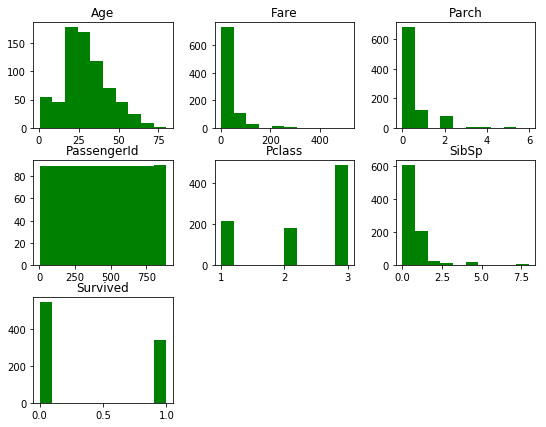

In [14]:
# preview distribution of non categorical features
df_train.hist(bins=10,figsize=(9,7),grid=False,color='green');

In [15]:
#Survivability by sex
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


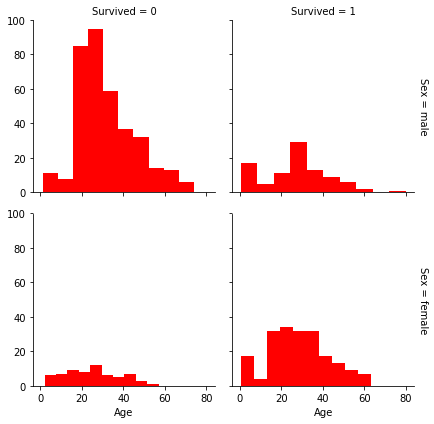

In [16]:
g = sns.FacetGrid(df_train, col="Survived", row="Sex", margin_titles=True)
g.map(plt.hist, "Age",color="red");

In [17]:
#Survivability by PClass
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
#Survivability by SibSb
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
#Survivability by Parch
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5,1,'Survival by Age')

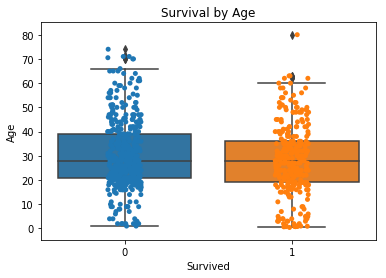

In [20]:
#Survival by Age
ax = sns.boxplot(x="Survived", y="Age", data=df_train)
ax = sns.stripplot(x="Survived", y="Age",data=df_train, jitter=True,edgecolor="gray")
plt.title("Survival by Age",fontsize=12)

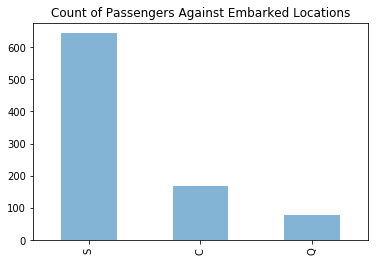

In [21]:
#Embarked Location Passengers Count
df_train['Embarked'].value_counts().plot(kind='bar', alpha=0.55)
plt.title("Count of Passengers Against Embarked Locations");

C:\Users\rongshiu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


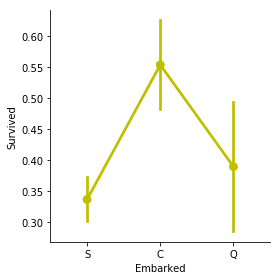

In [22]:
##Survivability by Embarked Location
sns.factorplot(x = 'Embarked', y='Survived', data = df_train,color="y")

C:\Users\rongshiu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


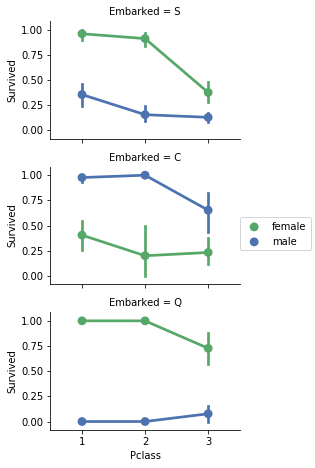

In [23]:
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Text(0.5,0.98,'Survival by Gender , Age and Fare')

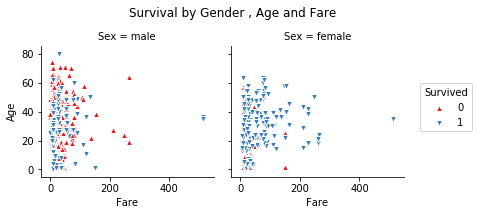

In [24]:
g = sns.FacetGrid(df_train, hue="Survived", col="Sex", margin_titles=True,palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

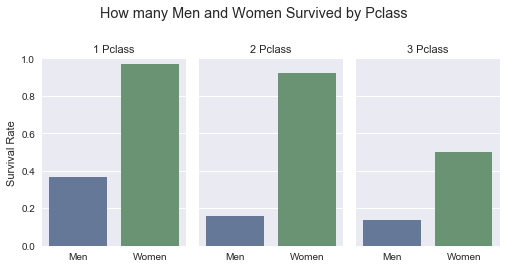

In [25]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",data=df_train, saturation=.5,kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
.set_xticklabels(["Men", "Women"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
.despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Pclass');

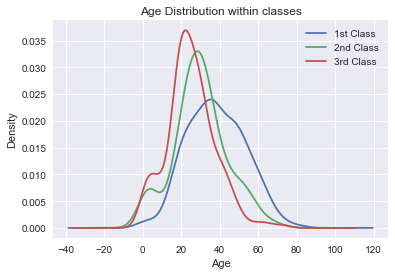

In [26]:
df_train.Age[df_train.Pclass == 1].plot(kind='kde')  
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')
# plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

## Handling Missing Values

In [27]:
# Age,Cabin and Embarked are the 3 columns with Missing Values in df_train. 
# We will drop column Cabin since majority of the values (77.10%) are missing 
# Age has 19.86% of missing values, we will fill the missing values with median
df_train=df_train.drop(columns={'Cabin'})
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

In [28]:
#preview of missing embarked data
df_train.loc[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


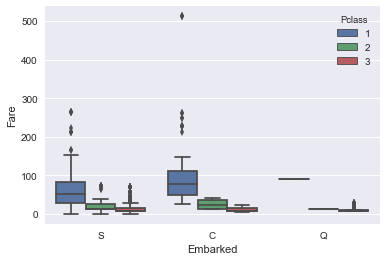

In [29]:
#both passengers has similarity in ticket,fare and pclass
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df_train)

In [30]:
#predict the missing values to be Embarked through location C since C has median fare closest to 80
df_train['Embarked'].fillna('C',inplace=True)

In [31]:
# Age,Cabin and Fare are the 3 columns with Missing Values in df_train. 
# We will drop column Cabin since majority of the values (78.23%) are missing 
# Fare has <1% of missing values, we will fill the missing values with median
# Age has 20.57% of missing values, we will fill the missing values with median
df_test=df_test.drop(columns={'Cabin'})
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

# Feature Engineering

In [32]:
all_df=[df_train,df_test]

In [33]:
#Create a new feature family size using SibSp+Parch
for df in all_df:
    df.loc[(df['SibSp']+df['Parch'])>=4,'Family_Size']='Large'
    df.loc[((df['SibSp']+df['Parch'])>0)&((df['SibSp']+df['Parch'])<4),'Family_Size']='Small'
    df.loc[(df['SibSp']+df['Parch'])==0,'Family_Size']='Single'
df_train[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family_Size,Survived
2,Small,0.578767
1,Single,0.303538
0,Large,0.161290


In [34]:
#Create a new feature title
def get_title(name):
    title=name.split(',')[1].split('.')[0].strip()
    return title

for df in all_df:
    df['Title'] = df.apply(lambda x: get_title(x.Name),axis=1)
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Title,Survived
11,Mr,517
8,Miss,182
12,Mrs,125
7,Master,40
3,Dr,7
14,Rev,6
6,Major,2
1,Col,2
9,Mlle,2
15,Sir,1


In [35]:
#Overwrite titles into fewer common categories
for df in all_df:
    df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Others,0.347826
2,Mr,0.156673


In [36]:
#perform one hot encoder to transform categorical data
labelEnc=LabelEncoder()
# cat_vars=['Sex','Embarked','Age_Group','Fare_Group','Family_Size','Title']
cat_vars=['Sex','Embarked','Family_Size','Title']
for col in cat_vars:
    df_train[col]=labelEnc.fit_transform(df_train[col])
    df_test[col]=labelEnc.fit_transform(df_test[col])

In [37]:
std_scale = preprocessing.StandardScaler().fit(df_train[['Age', 'Fare']])
df_train[['Age', 'Fare']] = std_scale.transform(df_train[['Age', 'Fare']])
df_test[['Age', 'Fare']] = std_scale.transform(df_test[['Age', 'Fare']])

C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rongshiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\rongshiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
#drop columns not considered for training features
df_train = df_train.drop(['Ticket', 'PassengerId','SibSp','Parch','Name'], axis=1)
df_test = df_test.drop(['Ticket','SibSp','Parch','Name'], axis=1)

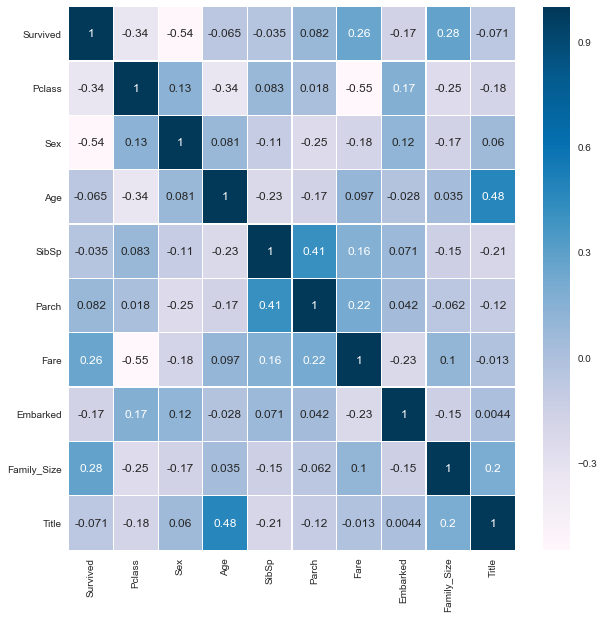

In [39]:
#display correlation of features
sns.heatmap(df_train.corr(),annot=True,cmap='PuBu',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Modeling

In [40]:
X_train = df_train.drop(columns={"Survived"})
y_train = df_train["Survived"]
X_test  = df_test.drop(columns={"PassengerId"})

X_train.shape, y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [41]:
#list down all models to be used for cross validation
logreg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
gaussian = GaussianNB()
perceptron = Perceptron()
linear_svc = LinearSVC()
sgd = SGDClassifier()
decision_tree= DecisionTreeClassifier()
adb= AdaBoostClassifier()
random_forest= RandomForestClassifier()
extra_tree= ExtraTreesClassifier()
gb= GradientBoostingClassifier()
mlp= MLPClassifier()

models=[logreg,svc,knn,gaussian,perceptron,linear_svc,sgd,decision_tree,adb,random_forest,extra_tree,gb,mlp]
models_name='logreg,svc,knn,gaussian,perceptron,linear_svc,sgd,decision_tree,adb,random_forest,extra_tree,gb,mlp'.split(',')

In [42]:
#Get cv scores for all models
cv_scores=[]
kfold = StratifiedKFold(n_splits=10, random_state=42)
for model in models:
    model.fit(X_train, y_train)
    model_cv_scores= cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    cv_scores.append(model_cv_scores.mean())

C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of

In [43]:
results=pd.DataFrame({'model':models_name,'cv_scores':cv_scores})
results=results.sort_values(by=['cv_scores'],ascending=False)
display(results)

,model,cv_scores
11,gb,0.835027
1,svc,0.831644
8,adb,0.816001
0,logreg,0.814852
12,mlp,0.810433
5,linear_svc,0.810370
9,random_forest,0.809297
2,knn,0.803653
3,gaussian,0.802530
7,decision_tree,0.794716


# Hyperparameter Tuning

In [44]:
# Ada Boost
adb=AdaBoostClassifier(DecisionTreeClassifier(),random_state=42)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"], "base_estimator__splitter" : ["best", "random"],
                  "algorithm" : ["SAMME","SAMME.R"], "n_estimators" :[x for x in range(10,101,10)], "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
grid_adb = GridSearchCV(adb,param_grid = ada_param_grid, cv=kfold, scoring="accuracy",n_jobs=4, verbose = 1)
grid_adb.fit(X_train,y_train)
adb_best = grid_adb.best_estimator_
adb_best_params = grid_adb.best_params_
adb_best_score = grid_adb.best_score_

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 350 tasks      | elapsed:   13.7s
[Parallel(n_jobs=4)]: Done 850 tasks      | elapsed:   31.5s
[Parallel(n_jobs=4)]: Done 1550 tasks      | elapsed:   53.6s
[Parallel(n_jobs=4)]: Done 2450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 3550 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 4850 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 5600 out of 5600 | elapsed:  3.4min finished
C:\Users\rongshiu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
# Gradient boosting tunning
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_gb.fit(X_train,y_train)
gb_best = grid_gb.best_estimator_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   20.5s finished


In [46]:
# SVC classifier
svm = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

grid_svm = GridSearchCV(svm,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_svm.fit(X_train,y_train)
svm_best = grid_svm.best_estimator_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 273 out of 280 | elapsed:   20.8s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   21.9s finished


In [47]:
#ExtraTrees 
ex_param_grid = {"max_depth": [None],
              "max_features": [1,3,6,9],
              "min_samples_split": [2,3,6,9],
              "min_samples_leaf": [1,3,6,9],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gird_extra_tree = GridSearchCV(extra_tree,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gird_extra_tree.fit(X_train,y_train)
extra_tree_best = gird_extra_tree.best_estimator_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   33.4s
[Parallel(n_jobs=4)]: Done 633 tasks      | elapsed:   55.9s
[Parallel(n_jobs=4)]: Done 983 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1280 out of 1280 | elapsed:  2.0min finished


In [48]:
# RFC Parameters tunning 
rf_param_grid = {"max_depth": [None],
              "max_features": [1,3,6,9],
              "min_samples_split": [2,3,6,9],
              "min_samples_leaf": [1,3,6,9],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

grid_random_forest = GridSearchCV(random_forest,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_random_forest.fit(X_train,y_train)
random_forest_best = grid_random_forest.best_estimator_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   33.2s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1280 out of 1280 | elapsed:  2.1min finished


# Ensemble Model

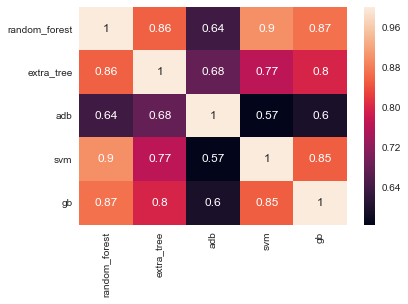

In [49]:
stack_random_forest=pd.Series(random_forest_best.predict(X_test),name='random_forest')
stack_extra_tree=pd.Series(extra_tree_best.predict(X_test),name='extra_tree')
stack_adb=pd.Series(adb_best.predict(X_test),name='adb')
stack_svm=pd.Series(svm_best.predict(X_test),name='svm')
stack_gb=pd.Series(gb_best.predict(X_test),name='gb')

# Concatenate all classifier results
ensemble_results = pd.concat([stack_random_forest,stack_extra_tree,stack_adb,stack_svm,stack_gb],axis=1)

#visualize correlation of models
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [50]:
ensembled_clf = VotingClassifier(estimators=[('random_forest_best', random_forest_best), ('extra_tree_best', extra_tree_best),
('adb_best', adb_best), ('svm_best',svm_best),('gb_best',gb_best)], voting='soft', n_jobs=4)
ensembled_clf = ensembled_clf.fit(X_train, y_train)

# Prediction

In [51]:
predictions=ensembled_clf.predict(X_test)

# Output CSV and Submit Result

In [52]:
submission = pd.DataFrame({"PassengerId": df_test["PassengerId"],"Survived": predictions})
submission.to_csv(r'C:\Users\rongshiu\Desktop\Kaggle\Datasets\Titanic\output.csv', index=False)